# TopSBM: Topic Modeling with Stochastic Block Models

A basic tutorial.


In [1]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

import graph_tool.all as gt
from sbmtm import sbmtm

# Setup: Load a corpus

1) We have a list of documents, each document contains a list of words.

2) We have a list of document titles (optional) 

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).



In [2]:
path_data = ''

## texts
fname_data = 'corpus.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r') as f:
    x = f.readlines()
texts = [h.split() for h in x]

## titles
fname_data = 'titles.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [3]:
i_doc = 0
print(titles[0])
print(texts[i_doc][:10])


Nuclear_Overhauser_effect
['the', 'nuclear', 'overhauser', 'effect', 'noe', 'is', 'the', 'transfer', 'of', 'nuclear']


# Fitting the model

In [4]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(texts,documents=titles)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

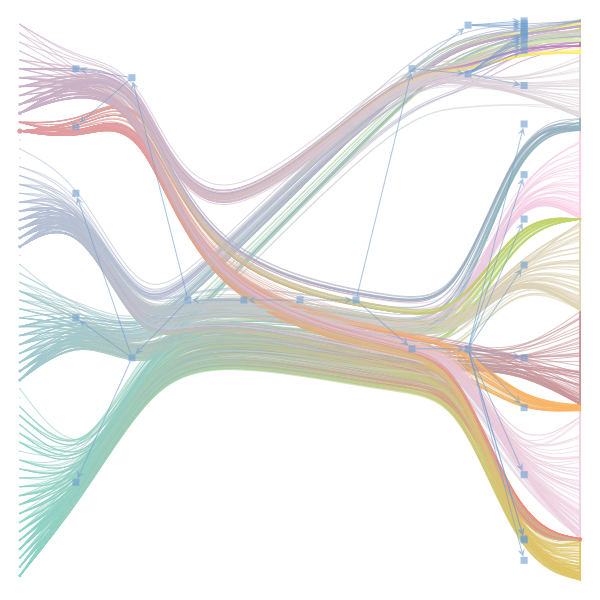

In [5]:
model.plot(filename='tmp.png',nedges=1000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [6]:
model.topics(l=1,n=20)

{0: [('the', 0.09634781561436787),
  ('of', 0.05437629843735887),
  ('and', 0.03378195284978773),
  ('a', 0.03155390961370547),
  ('to', 0.0305904314575618),
  ('in', 0.02947640983952067),
  ('is', 0.024418149519766355),
  ('for', 0.012886520338421702),
  ('as', 0.012013368259416493),
  ('that', 0.009725107638575257),
  ('are', 0.009303585945262398),
  ('by', 0.008611086020534129),
  ('be', 0.00834010778911872),
  ('on', 0.00746695571011351),
  ('with', 0.00737662963297504),
  ('an', 0.00728630355583657),
  ('this', 0.0067142384006262604),
  ('formula', 0.0064131514768313615),
  ('can', 0.006232499322554421),
  ('which', 0.006172281937795442)],
 1: [('field', 0.062111801242236024),
  ('electron', 0.037888198757763975),
  ('mass', 0.037267080745341616),
  ('quantum', 0.03540372670807453),
  ('law', 0.03540372670807453),
  ('momentum', 0.034782608695652174),
  ('point', 0.03291925465838509),
  ('force', 0.02981366459627329),
  ('uncertainty', 0.029192546583850933),
  ('atoms', 0.02857142

## Topic-distribution in each document
Which topics contribute to each document?

In [7]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=1)

Nuclear_Overhauser_effect


[(0, 0.9335664335664335), (1, 0.038461538461538464), (2, 0.027972027972027972)]

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [8]:
model.clusters(l=1,n=5)

{0: [('Wave_tank', 1.0),
  ('Magic_angle_(EELS)', 1.0),
  ('Experimental_physics', 1.0),
  ('Particle-induced_X-ray_emission', 1.0),
  ('Ripple_tank', 1.0)],
 1: [('De_novo_transcriptome_assembly', 1.0),
  ('Premier_Biosoft', 1.0),
  ('Bioinformatics', 1.0),
  ('Computational_biology', 1.0),
  ('Folding@home', 1.0)]}

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [9]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1,)

2 Rovibrational_coupling


[(0, 'Nuclear_Overhauser_effect'),
 (1, 'Quantum_solvent'),
 (3, 'Effective_field_theory'),
 (4, 'Chemical_physics'),
 (5, 'Rotational_transition'),
 (6, 'Dynamic_nuclear_polarisation'),
 (7, 'Knight_shift'),
 (8, 'Polarizability'),
 (9, 'Anisotropic_liquid'),
 (10, 'Rotating_wave_approximation'),
 (11, 'RRKM_theory'),
 (12, 'Molecular_vibration'),
 (13, 'Fuel_mass_fraction'),
 (14, 'Electrostatic_deflection_(structural_element)'),
 (15, 'Magic_angle_(EELS)'),
 (16, 'Reactive_empirical_bond_order'),
 (17, 'Photofragment-ion_imaging'),
 (18, 'Molecular_beam'),
 (19, 'McConnell_equation'),
 (20, 'Ziff-Gulari-Barshad_model'),
 (21, 'Empirical_formula'),
 (22, 'Pauli_effect'),
 (23, 'SLAC_National_Accelerator_Laboratory'),
 (24, "Newton's_laws_of_motion"),
 (25, 'Uncertainty'),
 (26, 'Ripple_tank'),
 (27, 'Particle-induced_X-ray_emission'),
 (28, 'Experimental_physics'),
 (29, 'Complementary_experiments'),
 (30, 'Elevator_paradox_(physics)'),
 (31, 'Wave_tank'),
 (32, 'Philosophical_interp

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

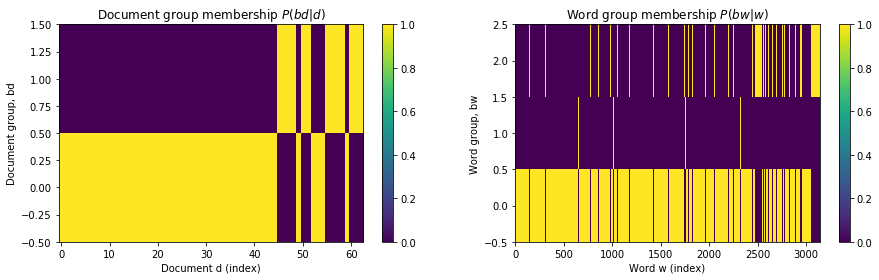

In [10]:
p_td_d,p_tw_w = model.group_membership(l=1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()